<a href="https://colab.research.google.com/github/RalphLynnMora/Coding-Projects/blob/main/LinearGaussianRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

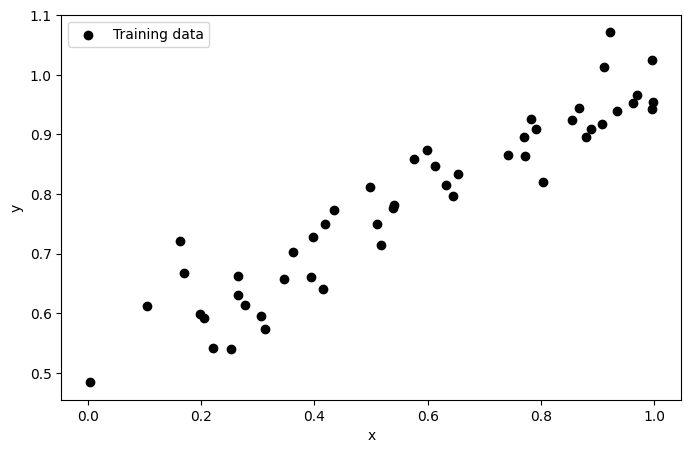

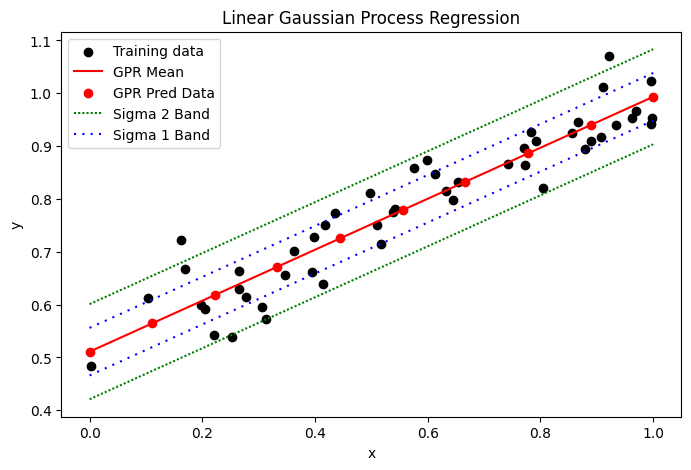

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel


# Function to generate samples from the linear model
def generate_samples(num_samples, sigma):
 X = np.random.rand(num_samples, 1)
 y = 0.5 * X + 0.5 + np.random.normal(0, sigma, size=(num_samples, 1))
 # Yn = 0.5Xn + 0.5 + Wn
 # S.T. Wn is an iid Gaussian noise with zero mean and variance sigma^2
 return X, y
sigma = 0.05
N_train_samples = 50
N_test_samples = 10
# Generate training data
X_train, y_train = generate_samples(N_train_samples, sigma=sigma)
# Generate test data
X_test = np.linspace(0, 1, N_test_samples).reshape(-1, 1)
#plot the training data and test data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c='black', label='Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Define the Gaussian Process model with a DotProduct kernel and white noise
kernel = DotProduct(sigma_0=0.5)
# kernel = DotProduct() + WhiteKernel(noise_level=0.1) + ConstantKernel(constant_vkernel = DotProduct() + WhiteKernel() + ConstantKernel()
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
# alpha is the variance of the white noise (sigma^2) intially set to 0.9
# Fit the Gaussian Process model to the training data
gp_model.fit(X_train, y_train)
# Make predictions on the test data
# y_pred, cov_matrix = gp_model.predict(X_test, return_cov=True)
# sigma_pred = np.sqrt(np.diag(cov_matrix))
y_pred, sigma_pred = gp_model.predict(X_test, return_std=True)
gp_model.kernel_
gp_model.get_params()


plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='black', label='Training data')
plt.plot(X_test, y_pred, color='red', label='GPR Mean')
plt.scatter(X_test, y_pred, color='red', label='GPR Pred Data')
plt.plot(X_test, y_pred - .09, linestyle=(0,(1,1)), color='g',label='Sigma 2 Band')
plt.plot(X_test, y_pred + .09 , linestyle=(0,(1,1)), color='green')
plt.plot(X_test, y_pred - .045 , linestyle=(0,(1,3)), color='blue',label='Sigma 1 Band')
plt.plot(X_test, y_pred + .045 , linestyle=(0,(1,3)), color='blue')
plt.title('Linear Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()